In [73]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [74]:
datas = keras.datasets.fashion_mnist

In [75]:
labels = ['Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [76]:
(X_train, y_train), (X_test, y_test) = datas.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


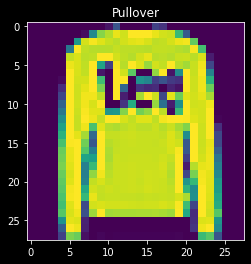

In [77]:
plt.title(labels[y_test[1]])
plt.imshow(X_test[1]);

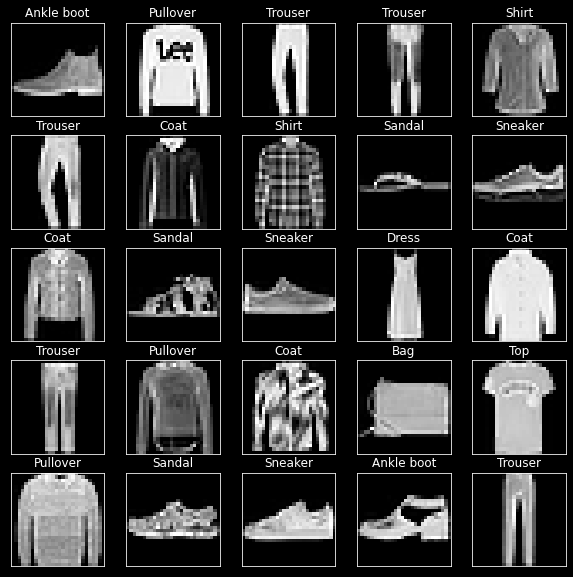

In [78]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.gray)
    plt.title(labels[y_test[i]])

plt.show()

In [81]:
print(y_train)
print(y_train.shape)

print("---------one-hot-encoded----------")
print(to_categorical(y_train))
print(to_categorical(y_train).shape)

[9 0 0 ... 3 0 5]
(60000,)
---------one-hot-encoded----------
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(60000, 10)


In [82]:
print(y_test)
print(y_test.shape)

print("---------one-hot-encoded----------")
print(to_categorical(y_test))
print(to_categorical(y_test).shape)

[9 2 1 ... 8 1 5]
(10000,)
---------one-hot-encoded----------
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 10)


In [84]:
print(X_train.shape)
for i in range(4):
    print(np.expand_dims(X_train, i).shape)
print(np.expand_dims(X_train,-1).shape)

(60000, 28, 28)
(1, 60000, 28, 28)
(60000, 1, 28, 28)
(60000, 28, 1, 28)
(60000, 28, 28, 1)
(60000, 28, 28, 1)


In [85]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [86]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [87]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

In [88]:
model.add(Conv2D(
    filters=32,
    kernel_size=(3,3),
    activation='relu',
    input_shape=(28,28,1),
    padding='same'
))
model.add(MaxPooling2D(
    pool_size=(4,4)
))
model.add(Flatten())
model.add(Dense(
    units=10,
    activation='softmax'
))

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                15690     
Total params: 16,010
Trainable params: 16,010
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [91]:
history = model.fit(X_train, y_train, epochs=1)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.7195 - accuracy: 0.7539


In [92]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3948 - accuracy: 0.8578


[0.3947678208351135, 0.8578000068664551]

In [96]:
history.history

{'loss': [0.5033115148544312], 'accuracy': [0.8230999708175659]}

In [100]:
from keras.applications.vgg16 import VGG16

model = VGG16()
model.summary()

553467904/553467096 [==============================] - 17s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

In [101]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [110]:
img = load_img('vgg_test.jpg', target_size=(224,224))
img.size

(224, 224)

In [132]:
img_arr = img_to_array(img)
print(img_arr.size)
print(img_arr.shape)

150528
(224, 224, 3)


In [133]:
img_arr = np.expand_dims(img_arr, 0)
img_arr.shape

(1, 224, 224, 3)

In [135]:
print(img_arr.min(), img_arr.max())

0.0 255.0


In [136]:
from keras.applications.vgg16 import preprocess_input

In [137]:
img_arr = preprocess_input(img_arr)

print(img_arr.min(), img_arr.max())

-123.68 151.061


In [153]:
pred = model.predict(img_arr)

In [154]:
pred.shape

(1, 1000)

In [155]:
pred.max()

0.7030008

In [156]:
from keras.applications.vgg16 import decode_predictions

In [157]:
label = decode_predictions(pred)
label

40960/35363 [==================================] - 0s 3us/step


[[('n03895866', 'passenger_car', 0.7030008),
  ('n03272562', 'electric_locomotive', 0.1072056),
  ('n04335435', 'streetcar', 0.09598875),
  ('n02917067', 'bullet_train', 0.09322146),
  ('n03393912', 'freight_car', 0.00036537918)]]